In [7]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (
    cross_val_score, RepeatedStratifiedKFold,RandomizedSearchCV, GridSearchCV, train_test_split
    )
from sklearn.metrics import mean_absolute_error, mean_squared_error
import yfinance as yf

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 500)

RANDOM_SEED = 42

In [8]:
start_date = "2020-01-01"
end_date = "2021-07-31"

ticker = 'iBovespa'

df_ticker = yf.download('^BVSP', start=start_date, end=end_date)
df_ticker.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500


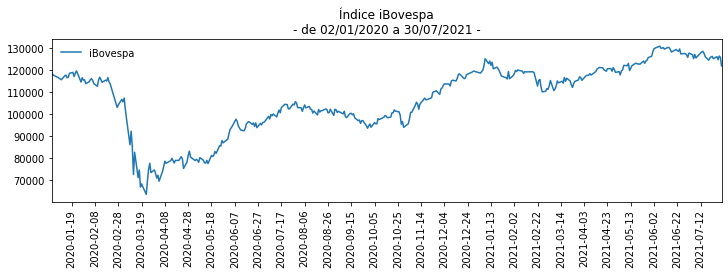

In [9]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(111)

ax.plot(df_ticker['Close'], label=ticker)

date_min = df_ticker.index.min()
date_max = df_ticker.index.max()
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.set_xlim(left=date_min, right=date_max)
ax.set_title(f"""Índice {ticker}
- de {date_min.strftime("%d/%m/%Y")} a {date_max.strftime("%d/%m/%Y")} -""", fontsize = 12)

ax.legend(loc='upper left', frameon=False)
plt.xticks(rotation=90)
plt.show();